# My score will go on...

## 1 Import Data and necessary packages

In [0]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)

In [0]:
# Load the Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
# create DataFrame with PassengerID column to use later on
data_test_id = test[['PassengerId']].copy()

# create the new datasets and drop columns in them
# that do no effect on survival
data_train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data_test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

##2 Getting information about Data

In [0]:
# Look at the Data and see that we have to
# get rid of categorical and null values 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


##3 Handling null data


###3.1 Remove data that can not be filled

In [5]:
data_train[(data_train['Fare'] == 0) & (data_train['Cabin'].isnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,0,3,male,36.0,0,0,0.0,NaN,S
271,1,3,male,25.0,0,0,0.0,NaN,S
277,0,2,male,NaN,0,0,0.0,NaN,S
302,0,3,male,19.0,0,0,0.0,NaN,S
413,0,2,male,NaN,0,0,0.0,NaN,S
466,0,2,male,NaN,0,0,0.0,NaN,S
481,0,2,male,NaN,0,0,0.0,NaN,S
597,0,3,male,49.0,0,0,0.0,NaN,S
633,0,1,male,NaN,0,0,0.0,NaN,S
674,0,2,male,NaN,0,0,0.0,NaN,S


In [0]:
index_to_drop = data_train[(data_train['Fare'] == 0) & (data_train['Cabin'].isnull())].index

In [0]:
data_train.drop(index_to_drop, inplace=True)

###3.2 Trasform deck description

In [8]:
data_train['Cabin'][data_train['Cabin'].isna() == False] = data_train['Cabin'].str[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data_train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

###3.3. First class passengers

In [0]:
data_train[data_train['Pclass'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  214 non-null    int64  
 1   Pclass    214 non-null    int64  
 2   Sex       214 non-null    object 
 3   Age       185 non-null    float64
 4   SibSp     214 non-null    int64  
 5   Parch     214 non-null    int64  
 6   Fare      214 non-null    float64
 7   Cabin     176 non-null    object 
 8   Embarked  212 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 16.7+ KB


In [0]:
data_train[data_train['Pclass'] == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,214.000000,214.0,185.000000,214.000000,214.000000,214.000000
mean,0.635514,1.0,38.234703,0.420561,0.359813,84.941180
std,0.482414,0.0,14.843017,0.613424,0.696384,78.320169
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,27.000000,0.000000,0.000000,31.000000
50%,1.000000,1.0,37.000000,0.000000,0.000000,61.277100
75%,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [0]:
def surviving_on_deck(dataset, passenger_class, passenger_gender, is_survived):
    
    """
    dataset - a dataset name to aggreagate ang plot
    passenger_class - a class when a passenger bought his(er) ticket
    passenger_gender - a gender of a passenger
    is_survived - 0 or 1, a mark that shows that a passenger survived or died
    """

    data_to_plot = dataset[
           (dataset['Pclass'] == passenger_class) & 
           (dataset['Sex'] == passenger_gender) &
           (dataset['Survived'] == is_survived) &
           (dataset['Cabin'].isna()== False) &
           (dataset['Age'].isnull() == False)
           ].pivot_table(values=['Survived', 'Age', 'Fare'], 
                         index=['Cabin'], 
                         aggfunc={'Survived': 'count', 
                                  'Age': 'mean', 
                                  'Fare': 'mean'})
    
    if is_survived == 1:
        plot_title = f'Ditribution of the survived \
        {passenger_class}th class passengers ({passenger_gender})'
    elif is_survived == 0:
        plot_title = f'Ditribution of the died \
        {passenger_class}th class passengers ({passenger_gender})'
    
    plt.rcParams["figure.figsize"] = [15,5]
    bar_plot = data_to_plot.plot.bar(rot=0, title=plot_title)

    agg_data = dataset[
           (dataset['Pclass'] == passenger_class) & 
           (dataset['Sex'] == passenger_gender) &
           (dataset['Survived'] == is_survived) &
           (dataset['Cabin'].isna()== False) &
           (dataset['Age'].isnull() == False)
           ].pivot_table(values=['Survived', 'Age', 'Fare'], 
                         index=['Cabin'], 
                         aggfunc={'Survived': 'count', 
                                  'Age': 'mean', 
                                  'Fare': 'mean'})
    return agg_data

,Age,Fare,Survived
Cabin,,,
A,42.833333,45.131250,6
B,33.250000,190.304700,8
C,32.365000,72.573438,8
D,35.400000,64.385020,5
E,37.500000,33.361462,8


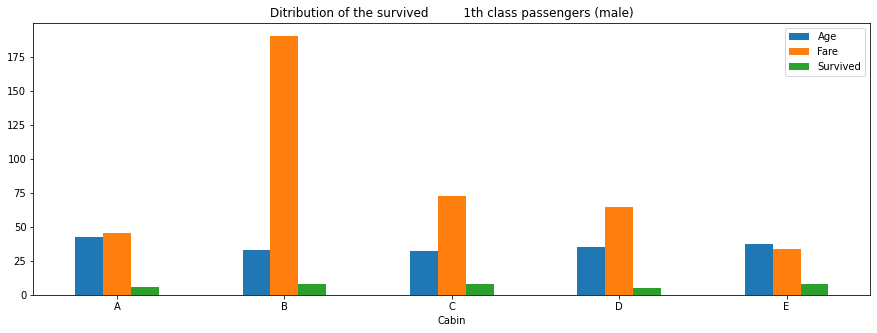

In [11]:
surviving_on_deck(data_train, 1, 'male', 1)

,Age,Fare,Survived
Cabin,,,
A,46.600000,31.194160,5
B,45.181818,62.331818,11
C,40.694444,99.121989,18
D,41.285714,59.613086,7
E,51.571429,48.460714,7
T,45.000000,35.500000,1


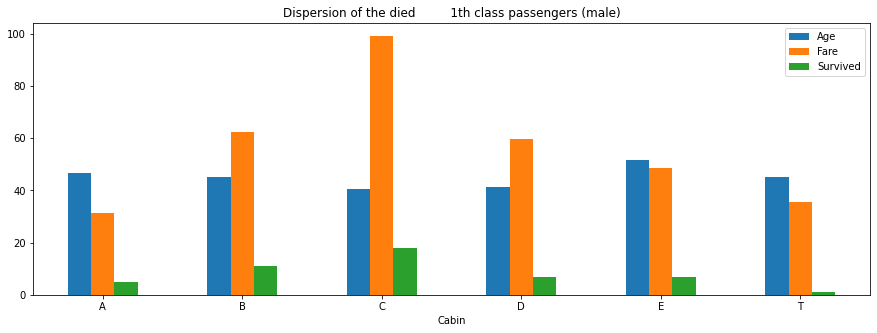

In [0]:
surviving_on_deck(data_train, 1, 'male', 0)

In [0]:
data_train['Cabin'][data_train['Cabin'] == 'T'] = 'C'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Fare,Survived
Cabin,,,
A,48.000000,39.600000,1
B,31.153846,114.621635,26
C,35.090909,122.372723,22
D,41.000000,67.688340,15
E,33.444444,81.376389,9


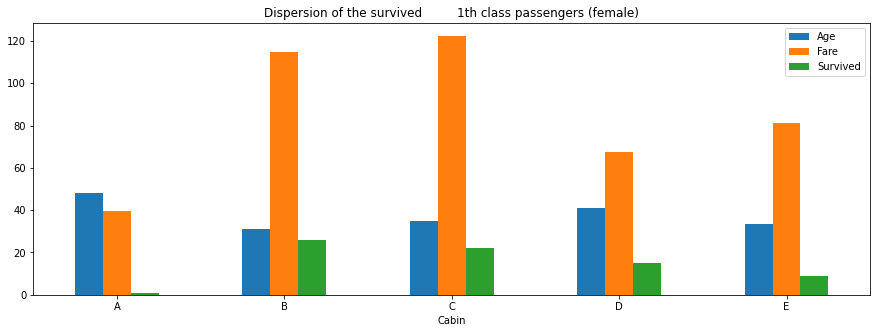

In [0]:
surviving_on_deck(data_train, 1, 'female', 1)

,Age,Fare,Survived
Cabin,,,
C,25.666667,110.604167,3


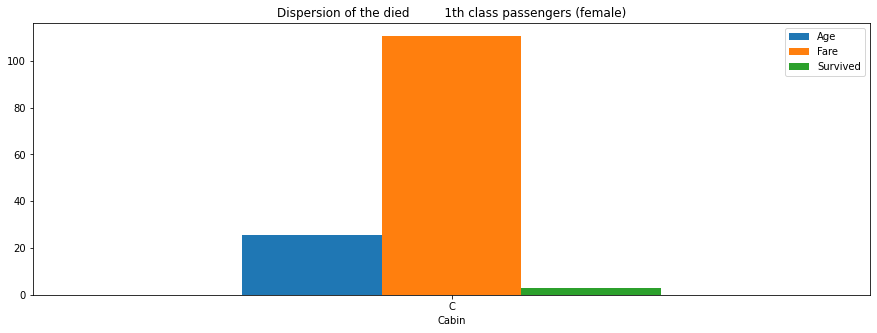

In [0]:
surviving_on_deck(data_train, 1, 'female', 0)

In [0]:
def filling_nan_cabin(dataset, passenger_class, passenger_gender, is_survived, deck):
    
    """
    dataset - a dataset name to aggreagate ang plot
    passenger_class - a class when a passenger bought his(er) ticket
    passenger_gender - a gender of a passenger
    is_survived - 0 or 1, a mark that shows that a passenger survived or died
    deck - a deck letter
    """

    dataset['Cabin'][
                    (dataset['Pclass'] == passenger_class) &
                    (dataset['Sex'] == passenger_gender) & 
                    (dataset['Survived'] == is_survived) &
                    (dataset['Cabin'].isna() == True)] = deck

In [0]:
filling_nan_cabin(data_train, 1, 'female', 0, 'C')
filling_nan_cabin(data_train, 1, 'female', 1, 'B')
filling_nan_cabin(data_train, 1, 'male', 0, 'C')
filling_nan_cabin(data_train, 1, 'male', 1, 'A')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Sex'] == 'male')
                  ].mean()

36.248000000000005

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Sex'] == 'male')
                  ].mean()

44.58196721311475

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Sex'] == 'female')
                  ].mean()

34.9390243902439

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Sex'] == 'female')
                  ].mean()

25.666666666666668

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 1) &
                  (data_train['Age'].isnull()) & 
                  (data_train['Sex'] == 'male')
                 ] = 36.24

data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 0) &
                  (data_train['Age'].isnull()) & 
                  (data_train['Sex'] == 'male') 
                  ] = 44.58

data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Age'].isnull()) &
                  (data_train['Sex'] == 'female')
                  ] = 34.93

data_train['Age'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Age'].isnull()) &
                  (data_train['Sex'] == 'female')
                  ] = 25.66

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A 

In [0]:
data_train['Fare'][
                   (data_train['Pclass'] == 1) &
                   (data_train['Embarked'].isnull() == True)]

61     80.0
829    80.0
Name: Fare, dtype: float64

In [0]:
data_train[
           (data_train['Pclass'] == 1) &
           (data_train['Embarked'].isnull() == False)
           ].pivot_table(
                        values =['Fare'],
                        index = ['Embarked']
           )

,Fare
Embarked,
C,104.718529
Q,90.000000
S,70.364862


In [0]:
data_train['Embarked'][
                  (data_train['Pclass'] == 1) & 
                  (data_train['Embarked'].isnull())
                  ] = 'S'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
data_train[data_train['Pclass'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  214 non-null    int64  
 1   Pclass    214 non-null    int64  
 2   Sex       214 non-null    object 
 3   Age       214 non-null    float64
 4   SibSp     214 non-null    int64  
 5   Parch     214 non-null    int64  
 6   Fare      214 non-null    float64
 7   Cabin     214 non-null    object 
 8   Embarked  214 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 16.7+ KB


###3.4. Second class passengers

In [0]:
data_train[data_train['Pclass'] == 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 9 to 886
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  178 non-null    int64  
 1   Pclass    178 non-null    int64  
 2   Sex       178 non-null    object 
 3   Age       173 non-null    float64
 4   SibSp     178 non-null    int64  
 5   Parch     178 non-null    int64  
 6   Fare      178 non-null    float64
 7   Cabin     16 non-null     object 
 8   Embarked  178 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.9+ KB


In [0]:
data_train[(data_train['Pclass'] == 2) & (data_train['Cabin'].isna()== False)].pivot_table(values=['Fare'], index=['Cabin'])

,Fare
Cabin,
D,22.685192
E,11.073529
F,25.286407


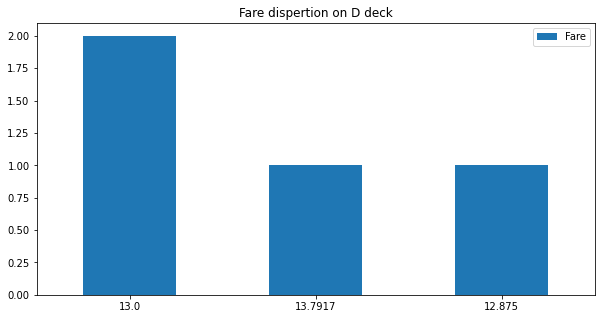

In [0]:
D_deck_class_2 = pd.DataFrame(data_train['Fare'][(data_train['Pclass'] == 2) & (data_train['Cabin'] == 'D')].value_counts())
plt.rcParams["figure.figsize"] = [10,5]
ax = D_deck_class_2.plot.bar(rot=0, title='Fare dispertion on D deck')

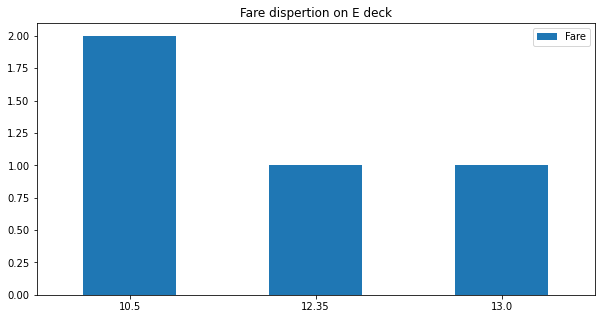

In [0]:
E_deck_class_2 = pd.DataFrame(data_train['Fare'][(data_train['Pclass'] == 2) & (data_train['Cabin'] == 'E')].value_counts())
plt.rcParams["figure.figsize"] = [10, 5]
ax = E_deck_class_2.plot.bar(rot=0, title='Fare dispertion on E deck')

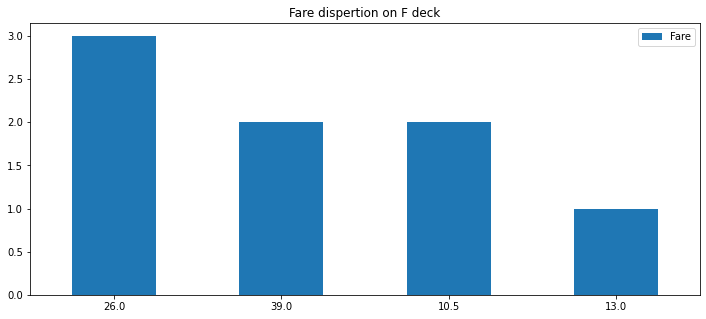

In [0]:
F_deck_class_2 = pd.DataFrame(data_train['Fare'][(data_train['Pclass'] == 2) & (data_train['Cabin'] == 'F')].value_counts())
plt.rcParams["figure.figsize"] = [12, 5]
ax = F_deck_class_2.plot.bar(rot=0, title='Fare dispertion on F deck')

In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==2) &
                    (data_train['Fare'] < 13) & 
                    (data_train['Cabin'].isna() == True)] = 'E'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==2) &
                    (data_train['Fare'] >= 13) & 
                    (data_train['Fare'] <= 20) &
                    (data_train['Cabin'].isna() == True)] = 'D'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==2) &
                    (data_train['Fare'] > 20) & 
                    (data_train['Fare'] <= 30) &
                    (data_train['Cabin'].isna() == True)] = 'F'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==2) &
                    (data_train['Cabin'].isna() == True)] = 'D'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Sex'] == 'male')
                  ].mean()

16.022

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Sex'] == 'male')
                  ].mean()

33.36904761904762

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Sex'] == 'female')
                  ].mean()

28.080882352941178

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Sex'] == 'female')
                  ].mean()

36.0

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 1) &
                  (data_train['Age'].isnull()) & 
                  (data_train['Sex'] == 'male')
                 ] = 16

data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 0) &
                  (data_train['Age'].isnull()) & 
                  (data_train['Sex'] == 'male') 
                  ] = 32

data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Age'].isnull()) &
                  (data_train['Sex'] == 'female')
                  ] = 28

data_train['Age'][
                  (data_train['Pclass'] == 2) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Age'].isnull()) &
                  (data_train['Sex'] == 'female')
                  ] = 36

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A 

In [0]:
data_train[data_train['Pclass'] == 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 9 to 886
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  178 non-null    int64  
 1   Pclass    178 non-null    int64  
 2   Sex       178 non-null    object 
 3   Age       178 non-null    float64
 4   SibSp     178 non-null    int64  
 5   Parch     178 non-null    int64  
 6   Fare      178 non-null    float64
 7   Cabin     178 non-null    object 
 8   Embarked  178 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.9+ KB


###3.5. Third class passengers

In [0]:
data_train[data_train['Pclass'] == 3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  487 non-null    int64  
 1   Pclass    487 non-null    int64  
 2   Sex       487 non-null    object 
 3   Age       351 non-null    float64
 4   SibSp     487 non-null    int64  
 5   Parch     487 non-null    int64  
 6   Fare      487 non-null    float64
 7   Cabin     12 non-null     object 
 8   Embarked  487 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 38.0+ KB


In [0]:
data_train[(data_train['Pclass'] == 3) & (data_train['Cabin'].isna()== False)].pivot_table(values=['Fare'], index=['Cabin'])

,Fare
Cabin,
E,11.00000
F,10.61166
G,13.58125


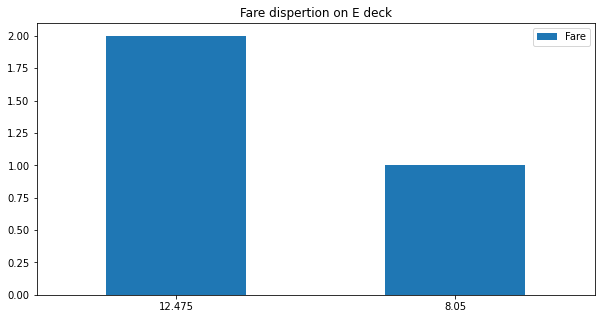

In [0]:
E_deck_class_3 = pd.DataFrame(data_train['Fare'][(data_train['Pclass'] == 3) & (data_train['Cabin'] == 'E')].value_counts())
plt.rcParams["figure.figsize"] = [10,5]
ax = E_deck_class_3.plot.bar(rot=0, title='Fare dispertion on E deck')

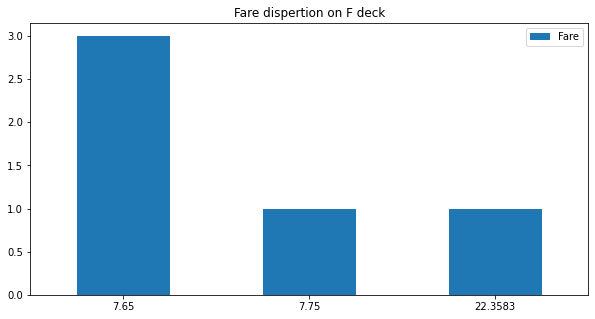

In [0]:
F_deck_class_3 = pd.DataFrame(data_train['Fare'][(data_train['Pclass'] == 3) & (data_train['Cabin'] == 'F')].value_counts())
plt.rcParams["figure.figsize"] = [10,5]
ax = F_deck_class_3.plot.bar(rot=0, title='Fare dispertion on F deck')

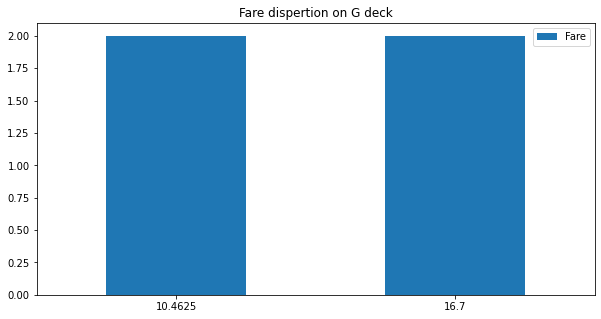

In [0]:
G_deck_class_3 = pd.DataFrame(data_train['Fare'][(data_train['Pclass'] == 3) & (data_train['Cabin'] == 'G')].value_counts())
plt.rcParams["figure.figsize"] = [10,5]
ax = G_deck_class_3.plot.bar(rot=0, title='Fare dispertion on G deck')

In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==3) &
                    (data_train['Fare'] < 8) & 
                    (data_train['Cabin'].isna() == True)] = 'F'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==3) &
                    (data_train['Fare'] >= 8) & 
                    (data_train['Fare'] < 12) & 
                    (data_train['Cabin'].isna() == True)] = 'G'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
data_train['Cabin'][
                    (data_train['Pclass']==3) &
                    (data_train['Fare'] >= 12) & 
                    (data_train['Cabin'].isna() == True)] = 'E'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Sex'] == 'male')
                  ].mean()

22.20054054054054

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Sex'] == 'male')
                  ].mean()

27.150943396226417

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Sex'] == 'female')
                  ].mean()

19.329787234042552

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Sex'] == 'female')
                  ].mean()

23.818181818181817

In [0]:
data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 1) &
                  (data_train['Age'].isnull()) & 
                  (data_train['Sex'] == 'male')
                 ] = 22.2

data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 0) &
                  (data_train['Age'].isnull()) & 
                  (data_train['Sex'] == 'male') 
                  ] = 27.1

data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 1) & 
                  (data_train['Age'].isnull()) &
                  (data_train['Sex'] == 'female')
                  ] = 19.3

data_train['Age'][
                  (data_train['Pclass'] == 3) & 
                  (data_train['Survived'] == 0) & 
                  (data_train['Age'].isnull()) &
                  (data_train['Sex'] == 'female')
                  ] = 23.8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A 

In [0]:
data_train[data_train['Pclass'] == 3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  487 non-null    int64  
 1   Pclass    487 non-null    int64  
 2   Sex       487 non-null    object 
 3   Age       487 non-null    float64
 4   SibSp     487 non-null    int64  
 5   Parch     487 non-null    int64  
 6   Fare      487 non-null    float64
 7   Cabin     487 non-null    object 
 8   Embarked  487 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 38.0+ KB


In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  879 non-null    int64  
 1   Pclass    879 non-null    int64  
 2   Sex       879 non-null    object 
 3   Age       879 non-null    float64
 4   SibSp     879 non-null    int64  
 5   Parch     879 non-null    int64  
 6   Fare      879 non-null    float64
 7   Cabin     879 non-null    object 
 8   Embarked  879 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 68.7+ KB


## 4 Handling categorical data

### 4.1 Change data types to numerical

In [0]:
Sex_embarked_mapping = {'male':0,'female':1}
data_train['Sex'] = data_train['Sex'].map(Sex_embarked_mapping)

In [0]:
Cabin_embarked_mapping = {'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
data_train['Cabin'] = data_train['Cabin'].map(Cabin_embarked_mapping)

In [0]:
Embarked_embarked_mapping = {'S':0,'C':1,'Q':2}
data_train['Embarked'] = data_train['Embarked'].map(Embarked_embarked_mapping)

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  879 non-null    int64  
 1   Pclass    879 non-null    int64  
 2   Sex       879 non-null    int64  
 3   Age       879 non-null    float64
 4   SibSp     879 non-null    int64  
 5   Parch     879 non-null    int64  
 6   Fare      879 non-null    float64
 7   Cabin     879 non-null    int64  
 8   Embarked  879 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 68.7 KB


In [0]:
# separete target from feature
y = data_train.Survived
data_train = data_train.drop(['Survived'], axis=1)

### 4.2 One-hot encoding

In [0]:
OHN_Sex = pd.get_dummies(data_train['Sex'], prefix="Sex", dummy_na=False)
OHN_Cabin = pd.get_dummies(data_train['Cabin'], prefix="Cabin", dummy_na=False)
OHN_Embarked = pd.get_dummies(data_train['Embarked'], prefix="Embarked", dummy_na=False)

In [0]:
data_train_OHN = pd.concat([data_train, OHN_Sex, OHN_Cabin, OHN_Embarked], axis=1)
data_train_OHN = data_train_OHN.drop(['Sex', 'Cabin', 'Embarked'], axis=1)

In [0]:
data_train_OHN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 890
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      879 non-null    int64  
 1   Age         879 non-null    float64
 2   SibSp       879 non-null    int64  
 3   Parch       879 non-null    int64  
 4   Fare        879 non-null    float64
 5   Sex_0       879 non-null    uint8  
 6   Sex_1       879 non-null    uint8  
 7   Cabin_0     879 non-null    uint8  
 8   Cabin_1     879 non-null    uint8  
 9   Cabin_2     879 non-null    uint8  
 10  Cabin_3     879 non-null    uint8  
 11  Cabin_4     879 non-null    uint8  
 12  Cabin_5     879 non-null    uint8  
 13  Cabin_6     879 non-null    uint8  
 14  Embarked_0  879 non-null    uint8  
 15  Embarked_1  879 non-null    uint8  
 16  Embarked_2  879 non-null    uint8  
dtypes: float64(2), int64(3), uint8(12)
memory usage: 51.5 KB


## 5 Preproce the Data an fit Random Forest Classifier

In [0]:
scaler_OHN = preprocessing.StandardScaler()
data_train_OHN_ST = scaler_OHN.fit_transform(data_train_OHN)

In [0]:
X_train_OHN, X_test_OHN, y_train_OHN, y_test_OHN = train_test_split(data_train_OHN_ST, y, test_size=0.2, random_state=42)

In [0]:
tuned_parameters_RF = [{
    'n_estimators': [5, 10, 25, 50, 75, 100, 200, 400, 800],
    'criterion': ['gini', 'entropy'],
    }]

In [0]:
titanic_model_RF = GridSearchCV(RandomForestClassifier(), tuned_parameters_RF, cv=5)
titanic_model_RF.fit(X_train_OHN,y_train_OHN)
titanic_model_RF.best_params_

{'criterion': 'entropy', 'n_estimators': 50}

In [0]:
np.round(titanic_model_RF.score(X_test_OHN,y_test_OHN), 2)

0.84

## 6 Preproce test Data and predict

In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [0]:
data_test['Cabin'][data_test['Cabin'].isna() == False] = data_test['Cabin'].str[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data_test.Cabin.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [0]:
def prepare_dataset(dataset_name):

  Sex_embarked_mapping = {'male':0,'female':1}
  dataset_name['Sex'] = dataset_name['Sex'].map(Sex_embarked_mapping)
  
  

  dataset_name['Cabin'].loc[(dataset_name['Pclass']==3) & (dataset_name['Sex']==0) & (test['Cabin'].isna() == True)] = 'G'
  dataset_name['Cabin'].loc[(dataset_name['Pclass']==3) & (dataset_name['Sex']==1) & (test['Cabin'].isna() == True)] = 'G'
  
  
  dataset_name['Cabin'].loc[(dataset_name['Pclass']==2) & (dataset_name['Sex']==0) & (test['Cabin'].isna() == True)] = 'E'
  dataset_name['Cabin'].loc[(dataset_name['Pclass']==2) & (dataset_name['Sex']==1) & (test['Cabin'].isna() == True)] = 'F'

  dataset_name['Cabin'].loc[(dataset_name['Pclass']==2) & (dataset_name['Sex']==0) & (dataset_name['Age'] < 36) & (test['Cabin'].isna() == True)] = 'C'
  dataset_name['Cabin'].loc[(dataset_name['Pclass']==2) & (dataset_name['Sex']==1) & (dataset_name['Age'] < 38) & (test['Cabin'].isna() == True)] = 'B'

  
  dataset_name['Cabin'].loc[(dataset_name['Pclass']==1) & (dataset_name['Sex']==0) & (test['Cabin'].isna() == True)] = 'B'
  dataset_name['Cabin'].loc[(dataset_name['Pclass']==1) & (dataset_name['Sex']==1) & (test['Cabin'].isna() == True)] = 'A'

  Cabin_embarked_mapping = {'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
  dataset_name['Cabin'] = dataset_name['Cabin'].map(Cabin_embarked_mapping)

  Embarked_embarked_mapping = {'S':0,'C':1,'Q':2}
  dataset_name['Embarked'] = dataset_name['Embarked'].map(Embarked_embarked_mapping)

  dataset_name['Age'].loc[(dataset_name['Age'].isna())] = dataset_name['Age'].mean()
  dataset_name['Fare'].loc[(dataset_name['Fare'].isna())] = dataset_name['Fare'].mean()
  
  print(dataset_name.shape)

  OHN_Sex = pd.get_dummies(dataset_name['Sex'], prefix="Sex", dummy_na=False)
  OHN_Cabin = pd.get_dummies(dataset_name['Cabin'], prefix="Cabin", dummy_na=False)
  OHN_Embarked = pd.get_dummies(dataset_name['Embarked'], prefix="Embarked", dummy_na=False)
  
  dataset_name = pd.concat([dataset_name, OHN_Sex, OHN_Cabin, OHN_Embarked], axis=1)
  
  print(dataset_name.shape)
  
  dataset_name = dataset_name.drop(['Sex', 'Cabin', 'Embarked'], axis=1)

  print(dataset_name.shape)

  scaler_OHN = preprocessing.StandardScaler()
  dataset_name = scaler_OHN.fit_transform(dataset_name)



  return dataset_name
 

In [0]:
test = prepare_dataset(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarnin

In [0]:
scaler_OHN_test = preprocessing.StandardScaler()
data_train_OHN_ST_test = scaler_OHN.fit_transform(test)

In [0]:
predicted_test_dataset = titanic_model_RF.predict(data_train_OHN_ST_test)

In [0]:
predicted_test_dataset

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [0]:
test_survived = pd.DataFrame(predicted_test_dataset, columns=['Survived'])

In [0]:
submission = data_test_id.join(test_survived)

In [0]:
submission.to_csv("titanic_submission.csv", index=False)